<center>
<img src="https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/img/ods_stickers.jpg" />
    
# [mlcourse.ai](https://mlcourse.ai) - Cours Open Machine Learning

<center>
Auteur: [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/). Traduit et édité par Alena Sharlo, [Yury Kashnitsky](https://yorko.github.io), [Artem Trunov](https://www.linkedin.com/in/datamove), [Anastasia Manokhina](https: //www.linkedin.com/in/anastasiamanokhina/), [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) et [Ousmane Cissé](https://www.linkedin.com/in/ousmane-cissé).  
<center>
Ce matériel est soumis aux termes et conditions de la licence [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).  
L'utilisation gratuite est autorisée à des fins non commerciales.

# <center>Topic 2. Analyse visuelle des données en Python
## <center>Partie 2. Présentation des bibliothèques Seaborn, Matplotlib et Plotly

### Plan

1. [Dataset](#1.-Dataset)
2. [DataFrame.plot()](#2.-DataFrame.plot)
3. [Seaborn](#3.-Seaborn)
4. [Plotly](#4.-Plotly)
5. [Demo assignment](#5.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)

## 1. Dataset (Jeu de données)

Tout d'abord, nous allons configurer notre environnement en important toutes les bibliothèques nécessaires. Nous allons également modifier les paramètres d'affichage pour mieux afficher les tracés.

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

Maintenant, chargeons l'ensemble de données que nous utiliserons dans un «DataFrame». J'ai choisi un ensemble de données sur les ventes et les évaluations de jeux vidéo dans [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).  
Certains jeux de cet ensemble de données manquent de notes; Par conséquent, filtrons uniquement les exemples dont toutes les valeurs sont présentes.

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/video_games_sales.csv"
).dropna()
print(df.shape)

(6825, 16)


Ensuite, affichons le résumé du `DataFrame` pour vérifier les types de données et pour vérifier que tout n'est pas nul.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


Nous voyons que `pandas` a chargé certaines des caractéristiques numériques en tant que type` objet`. Nous convertirons explicitement ces colonnes en `float` et` int`.

In [4]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

Le «DataFrame» résultant contient 6825 exemples et 16 colonnes.  
Regardons les premières entrées avec la méthode `head ()` pour vérifier que tout a été correctement analysé.  
Pour le rendre plus pratique, je n'ai listé que les variables que nous utiliserons dans ce cahier.

In [5]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


## 2. DataFrame.plot ()

Avant de passer à Seaborn et Plotly, discutons de la manière la plus simple et souvent la plus pratique de visualiser les données d'un `DataFrame`: en utilisant sa propre méthode `plot()`.

Par exemple, nous allons créer un graphique des ventes de jeux vidéo par pays et par année.  
Tout d'abord, ne conservons que les colonnes dont nous avons besoin. Ensuite, nous calculerons le total des ventes par année et appellerons la méthode `plot()` sur le `DataFrame` résultant.

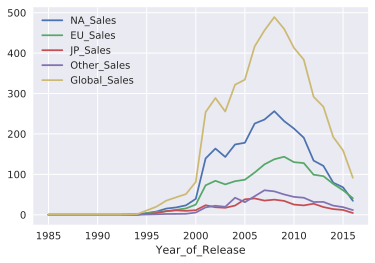

In [6]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot();

Notez que l'implémentation de la méthode `plot()` dans `pandas` est basée sur `matplotlib`.

En utilisant le paramètre `kind`, vous pouvez changer le type du tracé en, par exemple, un *graphique à barres*. `matplotlib` est généralement assez flexible pour personnaliser les tracés. Vous pouvez modifier presque tout dans le graphique, mais vous devrez peut-être fouiller dans la [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) pour trouver le paramètres correspondants. Par exemple, le paramètre `rot` est responsable de l'angle de rotation des graduations sur l'axe x (pour les tracés verticaux):

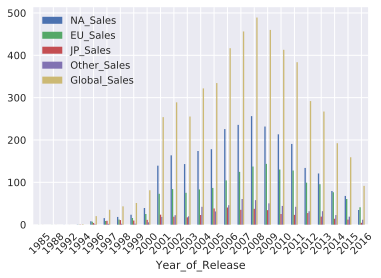

In [7]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45);

## 3. Seaborn

Passons maintenant à la bibliothèque `Seaborn`. `seaborn` est essentiellement une API de niveau supérieur basée sur la bibliothèque` matplotlib`. Entre autres choses, elle diffère de cette dernière en ce qu'elle contient des paramètres par défaut plus adéquats pour le traçage. En ajoutant `import seaborn as sns; sns.set()`dans votre code, les images de vos tracés deviendront beaucoup plus belles. En outre, cette bibliothèque contient un ensemble d'outils de visualisation complexes qui autrement (c'est-à-dire lors de l'utilisation de `matplotlib`) nécessiteraient une assez grande quantité de code.

#### pairplot ()

Jetons un coup d'œil au premier de ces tracés complexes, un *tracé de relations par paires*, qui crée une matrice de nuages de points par défaut. Ce type de graphique nous aide à visualiser la relation entre différentes variables dans un seule affichage.

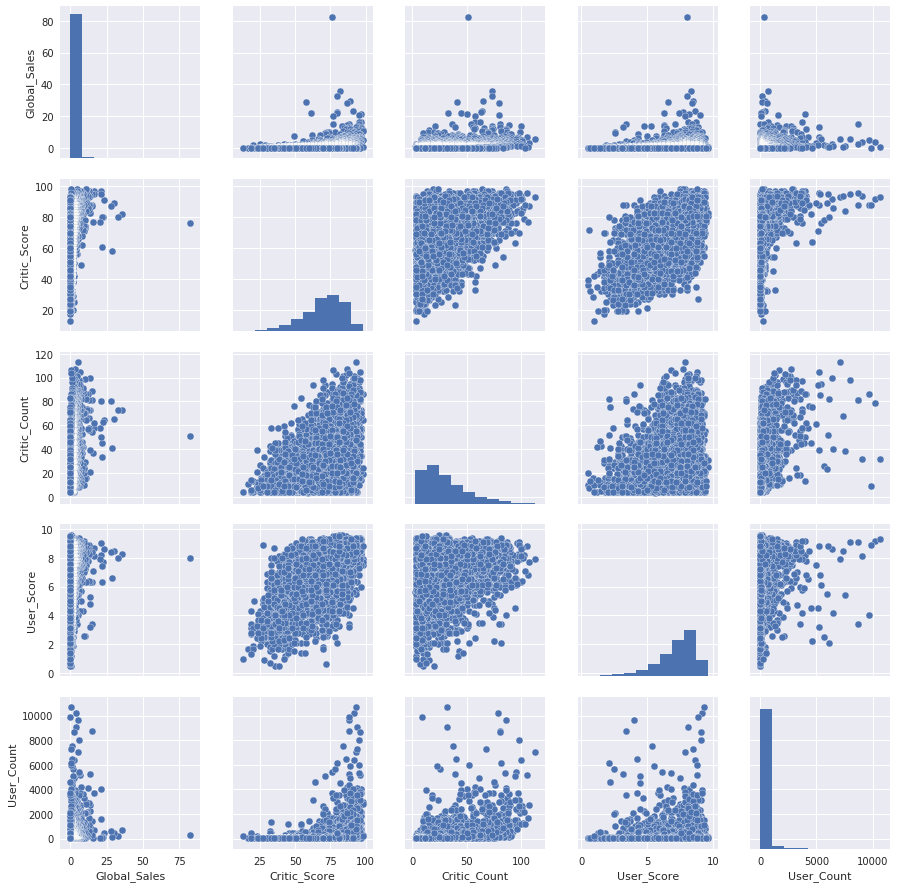

In [8]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

Comme vous pouvez le voir, les histogrammes de distribution se situent sur la diagonale de la matrice. Les graphiques restants sont des diagrammes de dispersion pour les paires d'entités correspondantes.

#### distplot ()

Il est également possible de tracer une distribution des observations avec le `distplot()` de `seaborn`.   
Par exemple, regardons la distribution des notes des critiques: «Critique _Score». Par défaut, le tracé affiche un histogramme et [l'estimation de la densité du noyau](https://en.wikipedia.org/wiki/Kernel_density_estimation).

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


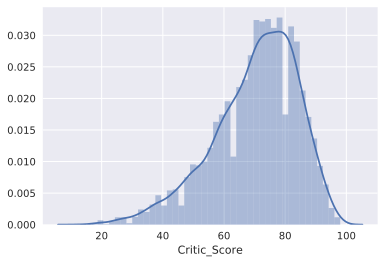

In [9]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df["Critic_Score"]);

#### jointplot ()

Pour examiner de plus près la relation entre deux variables numériques, on peut utiliser *joint plot*, qui est un croisement entre un nuage de points et un histogramme. Voyons comment les caractéristiques «Critic_Score» et «User_Score» sont liées.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


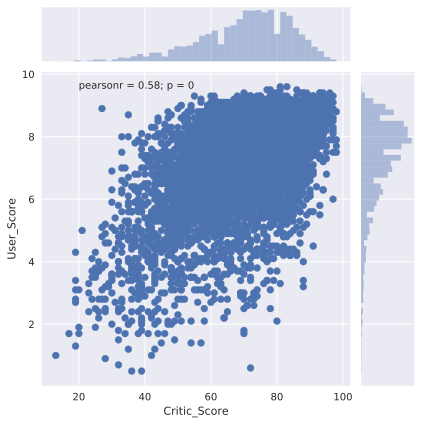

In [10]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter");

#### boxplot ()

Un autre type de tracé utile est une *Boîte à moustaches*. Comparons les notes des critiques pour les 5 plus grandes plateformes de jeux.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


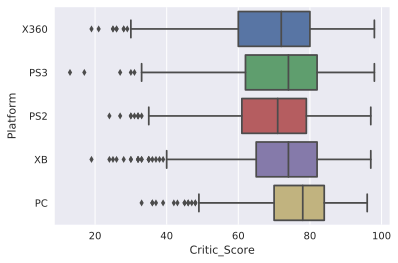

In [11]:
top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h",
);

Cela vaut la peine de passer un peu plus de temps à discuter de la façon d'interpréter une Boîte à moustaches. Ses composants sont une *boîte* (évidemment, c'est pourquoi il est appelé *box plot*), les soi-disant *moustaches* et un certain nombre de points individuels ( *valeurs aberrantes*).

L'encadré illustre à lui seul la répartition interquartile de la distribution; sa longueur est déterminée par les centiles $25\% \, (\text{Q1})$ et $75\% \, (\text{Q3})$. La ligne verticale à l'intérieur de la boîte marque la médiane ($50\%$) de la distribution.

Les moustaches sont les lignes qui partent de la boîte. Ils représentent la dispersion entière des points de données, en particulier les points qui tombent dans l'intervalle $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, où $\text{IQR} = \text{Q3} - \text{Q1}$ est la [plage interquartile](https://en.wikipedia.org/wiki/Interquartile_range).

Les valeurs aberrantes qui sortent de la plage délimitée par les moustaches sont tracées individuellement.

#### heatmap() (carte de chaleur)

Le dernier type de tracé que nous allons couvrir ici est une *carte thermique*. Une carte thermique vous permet de visualiser la distribution d'une variable numérique sur deux variables catégorielles. Visualisons les ventes totales de jeux par genre et par plate-forme de jeux.

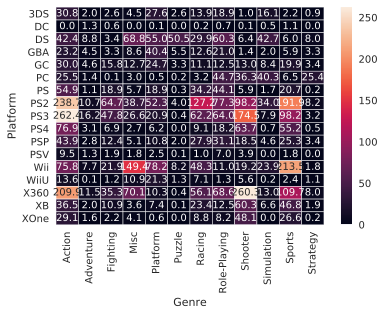

In [12]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

## 4. Plotly

Nous avons examiné quelques outils de visualisation basés sur la bibliothèque `matplotlib`. Cependant, ce n'est pas la seule option en `Python`. Jetons un œil à la bibliothèque `plotly`. Plotly est une bibliothèque open source qui permet de créer des tracés interactifs dans un bloc-notes Jupyter sans avoir à utiliser Javascript.

La vraie beauté des graphiques interactifs est qu'ils fournissent une interface utilisateur pour l'exploration détaillée des données. Par exemple, vous pouvez voir des valeurs numériques exactes en passant la souris sur des points, masquer des séries inintéressantes de la visualisation, zoomer sur une partie spécifique du tracé, etc.

Avant de commencer, importons tous les modules nécessaires et initialisons `plotly` en appelant la fonction `init_notebook_mode()`.

In [13]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

#### Line plot

Tout d'abord, construisons un *graphique linéaire* montrant le nombre de jeux sortis et leurs ventes par an.

In [14]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

`Figure` est la classe principale de la visualisation dans `plotly`. Il se compose des données (un tableau de lignes appelé «traces» dans cette bibliothèque) et du style (représenté par l'objet `layout`). Dans le cas le plus simple, vous pouvez appeler la fonction `iplot` pour renvoyer uniquement les `traces`.

Le paramètre `show _link` bascule la visibilité des liens menant à la plateforme en ligne `plot.ly` dans vos graphiques. La plupart du temps, cette fonctionnalité n'est pas nécessaire, vous pouvez donc la désactiver en passant `show_ link = False` pour éviter les clics accidentels sur ces liens.

In [15]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released"
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {"title": "Statistics for video games"}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

En option, vous pouvez enregistrer le tracé dans un fichier html:

In [18]:
plotly.offline.plot(fig, filename="years_stats.html", show_link=False);

#### Bar chart (Diagramme à barres)

Utilisons un *Diagramme à barres* pour comparer la part de marché des différentes plates-formes de jeu, ventilée par le nombre de nouvelles versions et par le total des revenus.

In [19]:
# Do calculations and prepare the dataset
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [20]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index, y=platforms_df["Global_Sales"], name="Global Sales"
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df["Number_of_Games"],
    name="Number of games released",
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {"title": "Market share by gaming platform"}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

#### Box plot

`plotly` prend également en charge les *box plots*. Examinons la répartition des notes des critiques par genre de jeu.

In [21]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

# Visualize
iplot(data, show_link=False)

En utilisant `plotly`, vous pouvez également créer d'autres types de visualisation. Même avec les paramètres par défaut, les tracés sont assez beaux. De plus, la bibliothèque facilite la modification de divers paramètres: couleurs, polices, légendes, annotations, etc.

## 5. Démonstration
Pour vous exercer à l'analyse visuelle des données, vous pouvez effectuer [cette mission](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data) où vous analyserez les données sur les maladies cardiovasculaires.

## 6. Ressources utiles
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).